In [1]:
# DataFrame
import pandas as pd

# Seaborn
import seaborn as sns

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error


# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import spacy

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
from collections import Counter
import time
from pathlib import Path

In [2]:
#Importing Datasets
song_data = pd.read_csv('Datasets/song_data.csv')
lyric_data = pd.read_csv('Datasets/lyrics-data.csv')
song_data

,name,release_date,total_tracks,artists,id,name.1,duration_ms,explicit,id.1,name.2,...,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,time_signature
0,...Ready For It?,2017-09-03,1.0,NaN,06HL4z0CvFAxyc27GXpf02,Taylor Swift,208198.0,False,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,...,0.0665,0.000000,0.1550,0.453,160.000,audio_features,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,4.0
1,Life Changes,2017-09-08,14.0,NaN,6x2LnllRG5uGarZMsD4iO8,Thomas Rhett,190227.0,False,4Vxu50qVrQcycjRyJQaZLC,Life Changes,...,0.1000,0.000000,0.0452,0.809,87.972,audio_features,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,4.0
2,24K Magic,2016-11-17,9.0,NaN,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,225983.0,False,6b8Be6ljOzmkOmFslEb23P,24K Magic,...,0.0340,0.000000,0.1530,0.632,106.970,audio_features,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,4.0
3,÷ (Deluxe),2017-03-03,16.0,NaN,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,...,0.0735,0.000000,0.3270,0.781,99.943,audio_features,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,4.0
4,x (Deluxe Edition),2014-06-21,16.0,NaN,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,...,0.6070,0.000464,0.0986,0.201,107.989,audio_features,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,NaN,NaN,NaN,NaN,4xRYI6VqpkE3UwrDrAZL8L,Logic,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10875,NaN,NaN,NaN,NaN,6jsjhAEteAlY0vCiLvMLBA,ROZES,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10876,Tha Carter V,2018-09-28,23.0,NaN,55Aa2cqylxrFIXC767Z865,Lil Wayne,249450.0,True,5BQrp63SHCVf4bzCzJePne,Don't Cry (feat. XXXTENTACION),...,0.4070,0.000000,0.1830,0.233,112.014,audio_features,spotify:track:5BQrp63SHCVf4bzCzJePne,https://api.spotify.com/v1/tracks/5BQrp63SHCVf...,https://api.spotify.com/v1/audio-analysis/5BQr...,4.0
10877,NaN,NaN,NaN,NaN,15UsOTVnJzReFVN1VCnxy4,XXXTENTACION,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
lyric_data

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...
379926,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en
379928,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en


In [4]:
song_data.info()
print('\nColumns in song_data:',song_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8958 non-null   object 
 1   release_date      8958 non-null   object 
 2   total_tracks      8958 non-null   float64
 3   artists           0 non-null      float64
 4   id                10879 non-null  object 
 5   name.1            10879 non-null  object 
 6   duration_ms       8958 non-null   float64
 7   explicit          8958 non-null   object 
 8   id.1              8958 non-null   object 
 9   name.2            8958 non-null   object 
 10  popularity        8958 non-null   float64
 11  danceability      8958 non-null   float64
 12  energy            8958 non-null   float64
 13  key               8958 non-null   float64
 14  loudness          8958 non-null   float64
 15  mode              8958 non-null   float64
 16  speechiness       8958 non-null   float6

In [5]:
lyric_data.info()
print('\nColumns in lyric_data:',lyric_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   SLink     379930 non-null  object
 3   Lyric     379854 non-null  object
 4   language  365296 non-null  object
dtypes: object(5)
memory usage: 14.5+ MB

Columns in lyric_data: Index(['ALink', 'SName', 'SLink', 'Lyric', 'language'], dtype='object')


In [6]:
# Dropping uneccessary columns 
lyric_data = lyric_data.drop(['SLink'], axis = 1)

song_data = song_data.drop(['type', 'uri', 'track_href', 'analysis_url', 'artists', 'id'], axis = 1)

# Dropping rows with popularity = 0 as they are not accurate

song_data = song_data[song_data.popularity != 0]

lyric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   Lyric     379854 non-null  object
 3   language  365296 non-null  object
dtypes: object(4)
memory usage: 11.6+ MB


In [7]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 1 to 10877
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6174 non-null   object 
 1   release_date      6174 non-null   object 
 2   total_tracks      6174 non-null   float64
 3   name.1            8095 non-null   object 
 4   duration_ms       6174 non-null   float64
 5   explicit          6174 non-null   object 
 6   id.1              6174 non-null   object 
 7   name.2            6174 non-null   object 
 8   popularity        6174 non-null   float64
 9   danceability      6174 non-null   float64
 10  energy            6174 non-null   float64
 11  key               6174 non-null   float64
 12  loudness          6174 non-null   float64
 13  mode              6174 non-null   float64
 14  speechiness       6174 non-null   float64
 15  acousticness      6174 non-null   float64
 16  instrumentalness  6174 non-null   float64

In [8]:
#Looking for null values in datasets
print('song_data:')
print(song_data.isnull().sum())
print('\n')
print('lyric_data:')
print(lyric_data.isnull().sum())

song_data:
name                1921
release_date        1921
total_tracks        1921
name.1                 0
duration_ms         1921
explicit            1921
id.1                1921
name.2              1921
popularity          1921
danceability        1921
energy              1921
key                 1921
loudness            1921
mode                1921
speechiness         1921
acousticness        1921
instrumentalness    1921
liveness            1921
valence             1921
tempo               1921
time_signature      1921
dtype: int64


lyric_data:
ALink           1
SName           3
Lyric          77
language    14635
dtype: int64


In [9]:
#Dropping NULL Values
song_data = song_data.dropna()
print(song_data.count())

name                6174
release_date        6174
total_tracks        6174
name.1              6174
duration_ms         6174
explicit            6174
id.1                6174
name.2              6174
popularity          6174
danceability        6174
energy              6174
key                 6174
loudness            6174
mode                6174
speechiness         6174
acousticness        6174
instrumentalness    6174
liveness            6174
valence             6174
tempo               6174
time_signature      6174
dtype: int64


In [10]:
#Dropping NULL Values
lyric_data = lyric_data.dropna()
print(lyric_data.count())

ALink       365294
SName       365294
Lyric       365294
language    365294
dtype: int64


In [11]:
#Looking for duplicates in each dataset
duplicate_rows_df = song_data[song_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (9, 21)


In [12]:
#Looking for duplicates in each dataset
duplicate_rows_df = lyric_data[lyric_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (3, 4)


In [13]:
#Dropping the duplicates
song_data = song_data.drop_duplicates()
print('song_data after removing duplicates:')
print(song_data.count())

song_data after removing duplicates:
name                6165
release_date        6165
total_tracks        6165
name.1              6165
duration_ms         6165
explicit            6165
id.1                6165
name.2              6165
popularity          6165
danceability        6165
energy              6165
key                 6165
loudness            6165
mode                6165
speechiness         6165
acousticness        6165
instrumentalness    6165
liveness            6165
valence             6165
tempo               6165
time_signature      6165
dtype: int64


In [14]:
#Dropping the duplicates
lyric_data = lyric_data.drop_duplicates()
print('lyric_data after removing duplicates:')
print(lyric_data.count())

lyric_data after removing duplicates:
ALink       365291
SName       365291
Lyric       365291
language    365291
dtype: int64


In [15]:
#Changing artist name in lyric data to match format in song_data
lyric_data['ALink'] = lyric_data['ALink'].str.replace('-',' ')
lyric_data['ALink'] = lyric_data['ALink'].str.replace('/','')
lyric_data

,ALink,SName,Lyric,language
0,ivete sangalo,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,ivete sangalo,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,ivete sangalo,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,ivete sangalo,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,ivete sangalo,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...
379926,clegg johnny,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,clegg johnny,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
379928,clegg johnny,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,clegg johnny,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [16]:
# Creating a temp df for song_data do that the song_name and artist_name match
temp_song = song_data
temp_song['name.1'] = temp_song['name.1'].str.lower()
temp_song.head(5)

,name,release_date,total_tracks,name.1,duration_ms,explicit,id.1,name.2,popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,Life Changes,2017-09-08,14.0,thomas rhett,190227.0,False,4Vxu50qVrQcycjRyJQaZLC,Life Changes,67.0,0.687,...,7.0,-4.370,1.0,0.0576,0.1000,0.000000,0.0452,0.809,87.972,4.0
2,24K Magic,2016-11-17,9.0,bruno mars,225983.0,False,6b8Be6ljOzmkOmFslEb23P,24K Magic,83.0,0.818,...,1.0,-4.282,1.0,0.0797,0.0340,0.000000,0.1530,0.632,106.970,4.0
3,÷ (Deluxe),2017-03-03,16.0,ed sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,82.0,0.624,...,9.0,-3.374,1.0,0.1000,0.0735,0.000000,0.3270,0.781,99.943,4.0
4,x (Deluxe Edition),2014-06-21,16.0,ed sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,88.0,0.614,...,4.0,-10.480,1.0,0.0476,0.6070,0.000464,0.0986,0.201,107.989,4.0
5,Havana (feat. Young Thug),2017-08-03,1.0,camila cabello,216897.0,False,0ofbQMrRDsUaVKq2mGLEAb,Havana (feat. Young Thug),2.0,0.768,...,7.0,-4.323,0.0,0.0312,0.1860,0.000038,0.1040,0.418,104.992,4.0


## Merging the datasets

In [17]:
#Using the Song id as the key for merging the datasets

data = temp_song.merge(lyric_data, left_on = ['name.2','name.1'], right_on = ['SName','ALink'],how='inner').drop(['SName','ALink'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1781 non-null   object 
 1   release_date      1781 non-null   object 
 2   total_tracks      1781 non-null   float64
 3   name.1            1781 non-null   object 
 4   duration_ms       1781 non-null   float64
 5   explicit          1781 non-null   object 
 6   id.1              1781 non-null   object 
 7   name.2            1781 non-null   object 
 8   popularity        1781 non-null   float64
 9   danceability      1781 non-null   float64
 10  energy            1781 non-null   float64
 11  key               1781 non-null   float64
 12  loudness          1781 non-null   float64
 13  mode              1781 non-null   float64
 14  speechiness       1781 non-null   float64
 15  acousticness      1781 non-null   float64
 16  instrumentalness  1781 non-null   float64


In [18]:
data

,name,release_date,total_tracks,name.1,duration_ms,explicit,id.1,name.2,popularity,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Lyric,language
0,÷ (Deluxe),2017-03-03,16.0,ed sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,82.0,0.624,...,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,4.0,She played the fiddle in an Irish band\nBut sh...,en
1,x (Deluxe Edition),2014-06-21,16.0,ed sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,88.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
2,x (Wembley Edition),2013,24.0,ed sheeran,258987.0,False,6fxVffaTuwjgEk5h9QyRjy,Photograph,69.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
3,Havana (feat. Young Thug),2017-08-03,1.0,camila cabello,216897.0,False,0ofbQMrRDsUaVKq2mGLEAb,Havana (feat. Young Thug),2.0,0.768,...,0.0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,4.0,"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en
4,Camila,2018-01-12,11.0,camila cabello,217307.0,False,1rfofaqEpACxVEHIZBJe6W,Havana (feat. Young Thug),85.0,0.765,...,1.0,0.0300,0.18400,0.000036,0.1320,0.394,104.988,4.0,"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,The Pains Of Growing,2018-11-30,15.0,alessia cara,208680.0,False,6qVwzCWDC6Kiatl7v2it7D,7 Days,47.0,0.503,...,0.0,0.1880,0.21400,0.000000,0.1650,0.798,79.157,4.0,If there's a God\nDo you think he's looking do...,en
1777,MAP OF THE SOUL : PERSONA,2019-04-12,7.0,bts,249215.0,False,6JdS5rJvJaRA7B1tcm7kxZ,Dionysus,36.0,0.502,...,1.0,0.1070,0.04000,0.000000,0.3190,0.588,176.084,4.0,Jjuk deurikyeo\nsuljan sippin' paljjang tippin...,en
1778,You Never Walk Alone,2017-02-13,18.0,bts,231860.0,False,4hrpoqJMVE7FxBu1YWx0eQ,Not Today,33.0,0.594,...,1.0,0.1260,0.00181,0.000001,0.9230,0.665,110.024,4.0,All the underdogs in the world\nA day may come...,en
1779,The Most Beautiful Moment in Life: Young Forever,2016-05-02,23.0,bts,210577.0,False,7dlNGfd6Fq8xcFb4K6Glws,I Need U,35.0,0.475,...,0.0,0.0736,0.01840,0.000000,0.2960,0.642,78.918,4.0,Fall (everything)\nFall (everything)\nFall (ev...,en


In [19]:
data.info()
print('\nColumns in data:',data.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1781 non-null   object 
 1   release_date      1781 non-null   object 
 2   total_tracks      1781 non-null   float64
 3   name.1            1781 non-null   object 
 4   duration_ms       1781 non-null   float64
 5   explicit          1781 non-null   object 
 6   id.1              1781 non-null   object 
 7   name.2            1781 non-null   object 
 8   popularity        1781 non-null   float64
 9   danceability      1781 non-null   float64
 10  energy            1781 non-null   float64
 11  key               1781 non-null   float64
 12  loudness          1781 non-null   float64
 13  mode              1781 non-null   float64
 14  speechiness       1781 non-null   float64
 15  acousticness      1781 non-null   float64
 16  instrumentalness  1781 non-null   float64


In [20]:
#Renaming Columns for better readabilty

data = data.rename(columns={"name": "album_name", "name.1": "artist_name", "name.2": "song_name", "id.1": "id", "Lyric" : "lyrics"})
data

,album_name,release_date,total_tracks,artist_name,duration_ms,explicit,id,song_name,popularity,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lyrics,language
0,÷ (Deluxe),2017-03-03,16.0,ed sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,82.0,0.624,...,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,4.0,She played the fiddle in an Irish band\nBut sh...,en
1,x (Deluxe Edition),2014-06-21,16.0,ed sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,88.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
2,x (Wembley Edition),2013,24.0,ed sheeran,258987.0,False,6fxVffaTuwjgEk5h9QyRjy,Photograph,69.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
3,Havana (feat. Young Thug),2017-08-03,1.0,camila cabello,216897.0,False,0ofbQMrRDsUaVKq2mGLEAb,Havana (feat. Young Thug),2.0,0.768,...,0.0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,4.0,"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en
4,Camila,2018-01-12,11.0,camila cabello,217307.0,False,1rfofaqEpACxVEHIZBJe6W,Havana (feat. Young Thug),85.0,0.765,...,1.0,0.0300,0.18400,0.000036,0.1320,0.394,104.988,4.0,"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,The Pains Of Growing,2018-11-30,15.0,alessia cara,208680.0,False,6qVwzCWDC6Kiatl7v2it7D,7 Days,47.0,0.503,...,0.0,0.1880,0.21400,0.000000,0.1650,0.798,79.157,4.0,If there's a God\nDo you think he's looking do...,en
1777,MAP OF THE SOUL : PERSONA,2019-04-12,7.0,bts,249215.0,False,6JdS5rJvJaRA7B1tcm7kxZ,Dionysus,36.0,0.502,...,1.0,0.1070,0.04000,0.000000,0.3190,0.588,176.084,4.0,Jjuk deurikyeo\nsuljan sippin' paljjang tippin...,en
1778,You Never Walk Alone,2017-02-13,18.0,bts,231860.0,False,4hrpoqJMVE7FxBu1YWx0eQ,Not Today,33.0,0.594,...,1.0,0.1260,0.00181,0.000001,0.9230,0.665,110.024,4.0,All the underdogs in the world\nA day may come...,en
1779,The Most Beautiful Moment in Life: Young Forever,2016-05-02,23.0,bts,210577.0,False,7dlNGfd6Fq8xcFb4K6Glws,I Need U,35.0,0.475,...,0.0,0.0736,0.01840,0.000000,0.2960,0.642,78.918,4.0,Fall (everything)\nFall (everything)\nFall (ev...,en


In [21]:
# Dropping duplicates
data = data.drop_duplicates(subset=['song_name'], keep='last')
data

,album_name,release_date,total_tracks,artist_name,duration_ms,explicit,id,song_name,popularity,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lyrics,language
0,÷ (Deluxe),2017-03-03,16.0,ed sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,82.0,0.624,...,1.0,0.1000,0.07350,0.000000,0.327,0.781,99.943,4.0,She played the fiddle in an Irish band\nBut sh...,en
4,Camila,2018-01-12,11.0,camila cabello,217307.0,False,1rfofaqEpACxVEHIZBJe6W,Havana (feat. Young Thug),85.0,0.765,...,1.0,0.0300,0.18400,0.000036,0.132,0.394,104.988,4.0,"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en
5,Unorthodox Jukebox,2012-12-07,10.0,bruno mars,213827.0,False,0nJW01T7XtvILxQgC5J7Wh,When I Was Your Man,88.0,0.612,...,1.0,0.0434,0.93200,0.000000,0.088,0.387,72.795,4.0,"Same bed, but it feels just\nA little bit bigg...",en
7,Picture Show,2012-01-01,11.0,neon trees,177280.0,False,2iUmqdfGZcHIhS3b9E9EWq,Everybody Talks,85.0,0.471,...,1.0,0.0586,0.00301,0.000000,0.313,0.725,154.961,4.0,Hey baby won't you look my way\nI can be your ...,en
9,Red (Deluxe Edition),2012-10-22,22.0,taylor swift,191880.0,False,1OYARuagDrpgNNQ4loO1Cs,We Are Never Ever Getting Back Together,56.0,0.628,...,1.0,0.0916,0.00957,0.000027,0.102,0.750,85.984,4.0,"I remember when we broke up, the first time\nS...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,The Pains Of Growing,2018-11-30,15.0,alessia cara,208680.0,False,6qVwzCWDC6Kiatl7v2it7D,7 Days,47.0,0.503,...,0.0,0.1880,0.21400,0.000000,0.165,0.798,79.157,4.0,If there's a God\nDo you think he's looking do...,en
1777,MAP OF THE SOUL : PERSONA,2019-04-12,7.0,bts,249215.0,False,6JdS5rJvJaRA7B1tcm7kxZ,Dionysus,36.0,0.502,...,1.0,0.1070,0.04000,0.000000,0.319,0.588,176.084,4.0,Jjuk deurikyeo\nsuljan sippin' paljjang tippin...,en
1778,You Never Walk Alone,2017-02-13,18.0,bts,231860.0,False,4hrpoqJMVE7FxBu1YWx0eQ,Not Today,33.0,0.594,...,1.0,0.1260,0.00181,0.000001,0.923,0.665,110.024,4.0,All the underdogs in the world\nA day may come...,en
1779,The Most Beautiful Moment in Life: Young Forever,2016-05-02,23.0,bts,210577.0,False,7dlNGfd6Fq8xcFb4K6Glws,I Need U,35.0,0.475,...,0.0,0.0736,0.01840,0.000000,0.296,0.642,78.918,4.0,Fall (everything)\nFall (everything)\nFall (ev...,en


In [22]:
data.info()
print('\nColumns in data:',data.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 0 to 1780
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album_name        1605 non-null   object 
 1   release_date      1605 non-null   object 
 2   total_tracks      1605 non-null   float64
 3   artist_name       1605 non-null   object 
 4   duration_ms       1605 non-null   float64
 5   explicit          1605 non-null   object 
 6   id                1605 non-null   object 
 7   song_name         1605 non-null   object 
 8   popularity        1605 non-null   float64
 9   danceability      1605 non-null   float64
 10  energy            1605 non-null   float64
 11  key               1605 non-null   float64
 12  loudness          1605 non-null   float64
 13  mode              1605 non-null   float64
 14  speechiness       1605 non-null   float64
 15  acousticness      1605 non-null   float64
 16  instrumentalness  1605 non-null   float64


## Scaling columns

In [23]:
#making a new dataset with only numerical data
comp_data = data.select_dtypes(include=['float64','int64'])
comp_data.info() 

#making a new dataset with only non numeric data
nn_data = data[['album_name', 'release_date', 'artist_name','explicit', 'song_name','lyrics', 'language']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_tracks      1605 non-null   float64
 1   duration_ms       1605 non-null   float64
 2   popularity        1605 non-null   float64
 3   danceability      1605 non-null   float64
 4   energy            1605 non-null   float64
 5   key               1605 non-null   float64
 6   loudness          1605 non-null   float64
 7   mode              1605 non-null   float64
 8   speechiness       1605 non-null   float64
 9   acousticness      1605 non-null   float64
 10  instrumentalness  1605 non-null   float64
 11  liveness          1605 non-null   float64
 12  valence           1605 non-null   float64
 13  tempo             1605 non-null   float64
 14  time_signature    1605 non-null   float64
dtypes: float64(15)
memory usage: 200.6 KB


In [24]:
# Min-Max Normalization
comp_data = (comp_data-comp_data.min())/(comp_data.max()-comp_data.min())
data = pd.concat((nn_data,comp_data), 1)
 
print("Scaled Dataset Using Pandas")
data.head(5)

Scaled Dataset Using Pandas


/var/folders/7_/0098ytkd34q91v84sqxckv_r0000gn/T/ipykernel_15583/4119080528.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data = pd.concat((nn_data,comp_data), 1)


,album_name,release_date,artist_name,explicit,song_name,lyrics,language,total_tracks,duration_ms,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,÷ (Deluxe),2017-03-03,ed sheeran,False,Galway Girl,She played the fiddle in an Irish band\nBut sh...,en,0.168539,0.040946,0.870968,...,0.818182,0.907149,1.0,0.171295,0.075075,0.000000,0.332754,0.781564,0.308951,0.75
4,Camila,2018-01-12,camila cabello,False,Havana (feat. Young Thug),"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en,0.112360,0.093116,0.903226,...,0.181818,0.860382,1.0,0.015774,0.187946,0.000036,0.120843,0.377090,0.341004,0.75
5,Unorthodox Jukebox,2012-12-07,bruno mars,False,When I Was Your Man,"Same bed, but it feels just\nA little bit bigg...",en,0.101124,0.089210,0.935484,...,0.000000,0.649956,1.0,0.045545,0.951992,0.000000,0.073028,0.369774,0.136466,0.75
7,Picture Show,2012-01-01,neon trees,False,Everybody Talks,Hey baby won't you look my way\nI can be your ...,en,0.112360,0.048189,0.903226,...,0.727273,0.881206,1.0,0.079316,0.003073,0.000000,0.317540,0.723035,0.658507,0.75
9,Red (Deluxe Edition),2012-10-22,taylor swift,False,We Are Never Ever Getting Back Together,"I remember when we broke up, the first time\nS...",en,0.235955,0.064576,0.591398,...,0.636364,0.783429,1.0,0.152633,0.009774,0.000027,0.088242,0.749164,0.220263,0.75


In [25]:
# Cleaned dataframe is saved as a csv file
filepath = Path('Datasets/cleaned.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)  

## Basic EDA

,total_tracks,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
total_tracks,1.000000,-0.022836,0.022940,0.037927,0.013930,-0.013663,-0.013647,0.018018,-0.001129,0.013523,-0.053008,0.022333,0.077574,0.024692,0.020690
duration_ms,-0.022836,1.000000,0.004476,-0.248414,-0.074131,-0.020828,-0.155583,-0.037382,-0.041376,-0.030330,0.136716,0.019371,-0.309342,-0.008497,-0.040981
popularity,0.022940,0.004476,1.000000,0.156467,-0.050828,-0.033083,0.021396,-0.030087,-0.014874,-0.002501,-0.148194,-0.058887,0.104006,-0.047494,0.031986
danceability,0.037927,-0.248414,0.156467,1.000000,-0.129046,0.031639,-0.017381,-0.061106,0.082636,0.034413,-0.153753,-0.056109,0.500225,-0.234104,0.115596
energy,0.013930,-0.074131,-0.050828,-0.129046,1.000000,0.006612,0.745152,-0.078473,0.123512,-0.696163,0.025954,0.194671,0.250719,0.212920,0.130420
key,-0.013663,-0.020828,-0.033083,0.031639,0.006612,1.000000,-0.005627,-0.138554,0.006240,-0.007408,-0.010602,0.019794,0.067690,0.012814,-0.046405
loudness,-0.013647,-0.155583,0.021396,-0.017381,0.745152,-0.005627,1.000000,-0.029426,0.066358,-0.592424,-0.114172,0.108816,0.161391,0.144643,0.078796
mode,0.018018,-0.037382,-0.030087,-0.061106,-0.078473,-0.138554,-0.029426,1.000000,-0.110786,0.114623,-0.058045,-0.017584,-0.036222,-0.018330,-0.049588
speechiness,-0.001129,-0.041376,-0.014874,0.082636,0.123512,0.006240,0.066358,-0.110786,1.000000,-0.078073,-0.015361,0.162887,0.077105,0.024635,0.051501
acousticness,0.013523,-0.030330,-0.002501,0.034413,-0.696163,-0.007408,-0.592424,0.114623,-0.078073,1.000000,-0.028634,-0.110787,-0.141570,-0.169324,-0.092383


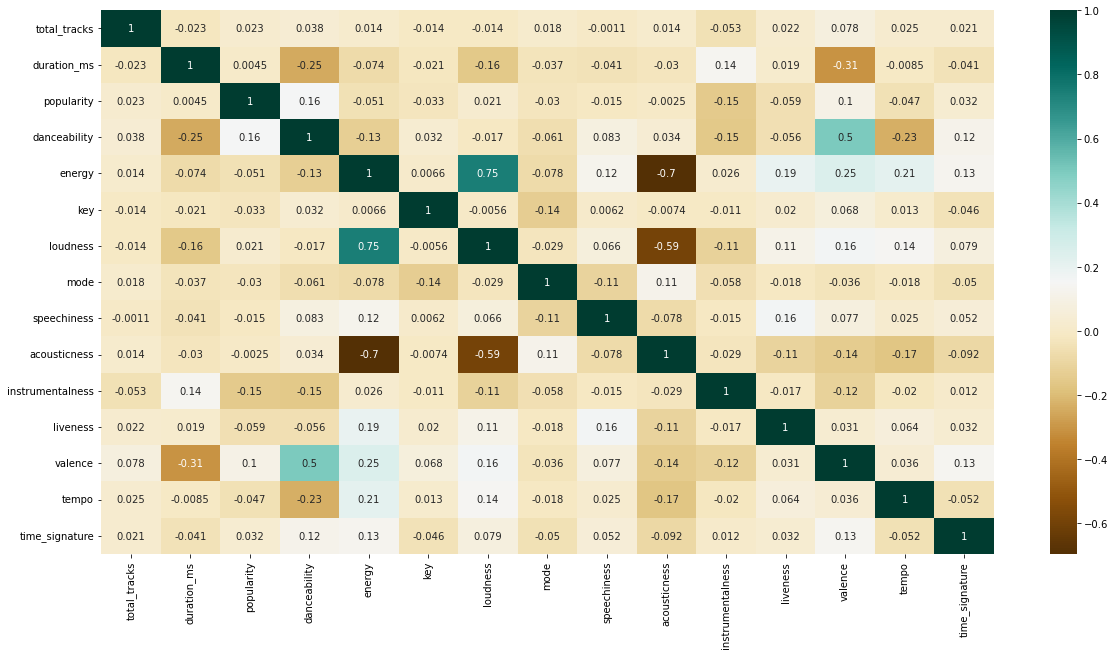

In [26]:
plt.figure(figsize=(20,10))
c = comp_data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

In [27]:
#making a new dataset with only numerical data
nn_data = data.select_dtypes(include=['float64','int64'])

# Split into train and test dataset.
data_train, data_test = train_test_split(nn_data, test_size=0.2, random_state=42)
print("TRAIN size:", len(data_train))
print("TEST size:", len(data_test))

TRAIN size: 1284
TEST size: 321


In [28]:
x_train = data_train.drop(['popularity', 'time_signature'], axis = 1).values
x_train

array([[0.15730337, 0.09964049, 0.51372998, ..., 0.07922191, 0.73766722,
        0.19585245],
       [0.15730337, 0.11664177, 0.86498856, ..., 0.32297327, 0.84009197,
        0.21596757],
       [0.        , 0.0158407 , 0.5778032 , ..., 0.09910889, 0.61747492,
        0.74232817],
       ...,
       [0.06741573, 0.01706077, 0.55949657, ..., 0.07063682, 0.18373746,
        0.52616999],
       [0.12359551, 0.13909014, 0.20251716, ..., 0.15018474, 0.20150502,
        0.2587964 ],
       [0.        , 0.10395394, 0.67048055, ..., 0.02814606, 0.61433946,
        0.47431287]])

In [29]:
x_test = data_test.drop(['popularity', 'time_signature'], axis = 1).values
x_test

array([[0.12359551, 0.13789252, 0.3604119 , ..., 0.13605738, 0.4868311 ,
        0.50039392],
       [0.31460674, 0.11990352, 0.21853547, ..., 0.24581613, 0.31229097,
        0.27583008],
       [0.12359551, 0.08965882, 0.63386728, ..., 0.00652032, 0.94042642,
        0.24561927],
       ...,
       [0.19101124, 0.1286292 , 0.43592677, ..., 0.11649641, 0.51400502,
        0.19023597],
       [0.08988764, 0.2032622 , 0.13501144, ..., 0.10128233, 0.00668896,
        0.49878013],
       [0.        , 0.04507634, 0.60755149, ..., 0.33166703, 0.5882107 ,
        0.67628372]])

In [30]:
y_train = data_train['popularity'].values
y_train

array([0.7311828 , 0.68817204, 0.70967742, ..., 0.38709677, 0.7311828 ,
       0.29032258])

In [31]:
y_test = data_test['popularity'].values
y_test

array([0.79569892, 0.6344086 , 0.80645161, 0.        , 0.6344086 ,
       0.83870968, 0.58064516, 0.52688172, 0.56989247, 0.8172043 ,
       0.55913978, 0.07526882, 0.35483871, 0.37634409, 0.41935484,
       0.67741935, 0.90322581, 0.46236559, 0.8172043 , 0.78494624,
       0.75268817, 0.92473118, 0.47311828, 0.50537634, 0.75268817,
       0.62365591, 0.91397849, 0.5483871 , 0.49462366, 0.64516129,
       0.89247312, 0.66666667, 0.67741935, 0.70967742, 0.68817204,
       0.68817204, 0.03225806, 0.50537634, 0.84946237, 0.68817204,
       0.49462366, 0.83870968, 0.74193548, 0.65591398, 0.62365591,
       0.88172043, 0.61290323, 0.72043011, 0.67741935, 0.53763441,
       0.51612903, 0.78494624, 0.53763441, 0.61290323, 0.34408602,
       0.70967742, 0.56989247, 0.75268817, 0.7311828 , 0.27956989,
       0.13978495, 0.74193548, 0.07526882, 0.25806452, 0.77419355,
       0.49462366, 0.5483871 , 0.82795699, 0.70967742, 0.75268817,
       0.50537634, 0.90322581, 0.34408602, 0.79569892, 0.66666

In [35]:
model = Sequential()
  
model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.fit(x=x_train, y=y_train, epochs=100, 
          validation_data=(x_test,y_test))

Epoch 1/100
41/41 [==============================] - 1s 5ms/step - loss: 0.1328 - val_loss: 0.0798
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0586 - val_loss: 0.0764
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0536 - val_loss: 0.0680
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0523 - val_loss: 0.0649
Epoch 5/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0490 - val_loss: 0.0576
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0456 - val_loss: 0.0599
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0440 - val_loss: 0.0576
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0451 - val_loss: 0.0581
Epoch 9/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0419 - val_loss: 0.0536
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0434 - val_loss: 0.0494
Epoch 11/

41/41 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.0469
Epoch 84/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0373 - val_loss: 0.0468
Epoch 85/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.0470
Epoch 86/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0372 - val_loss: 0.0467
Epoch 87/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0370 - val_loss: 0.0470
Epoch 88/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0376 - val_loss: 0.0466
Epoch 89/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.0469
Epoch 90/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0375 - val_loss: 0.0468
Epoch 91/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.0467
Epoch 92/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.0473
Epoch 93/100


<AxesSubplot:>

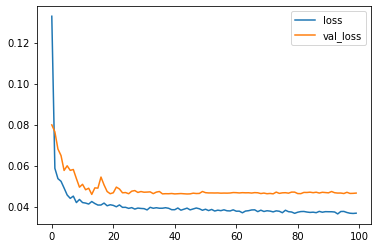

In [37]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [38]:
predictions = model.predict(x_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,0.590970,0.795699
1,0.577957,0.634409
2,0.650226,0.806452
3,0.685561,0.000000
4,0.582196,0.634409
5,0.669033,0.838710
6,0.656672,0.580645
7,0.604342,0.526882
8,0.708212,0.569892
9,0.662645,0.817204


In [39]:
mean_absolute_error(y_test,predictions)

0.16919308129045524

In [40]:

np.sqrt(mean_squared_error(y_test,predictions))

0.21574310211831285

## NLP

In [41]:
nltk.download('stopwords')
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pradyumn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
%%time
data.lyrics = data.lyrics.apply(lambda x: preprocess(x)) # preprocessing the text data.

CPU times: user 1.19 s, sys: 20.3 ms, total: 1.21 s
Wall time: 1.35 s


In [43]:
data.lyrics[0]

'played fiddle irish band fell love english man kissed neck took hand said baby want dance met grafton street right outside bar shared cigarette brother played guitar asked mean gaelic ink arm said one friend songs want drink took jamie chaser jack fun got arthur table johnny riding shotgun chatted one drink bar put van jukebox got dance know played fiddle irish band fell love english man kissed neck took hand said baby want dance pretty little galway girl pretty little galway girl know beat darts beat pool kissed like nobody else room last orders called stood stool dancing c ilidh singing trad tunes never heard carrickfergus ever sang sweet capella bar using feet beat oh could voice playing repeat week packed room swear singing know played fiddle irish band fell love english man kissed neck took hand said baby want dance pretty little galway girl galway girl galway girl galway girl outstayed welcome closing time holding hand hand holding mine coats smell smoke whisky wine fill lungs c

In [44]:
# Split into train and test dataset.
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 1284
TEST size: 321


In [45]:
data.lyrics[0:10]

0     played fiddle irish band fell love english man...
4     hey havana ooh na na ay half heart havana ooh ...
5     bed feels little bit bigger song radio sound f...
7     hey baby look way new addiction hey baby gotta...
9     remember broke first time saying enough like s...
12    hurting baby broken need loving loving need wi...
13    got condo manhattan baby girl hatnin ass invit...
14    queen since sixteen want things dream dreams a...
16    said let get town drive city away crowd though...
17    unwritten read mind undefined beginning pen ha...
Name: lyrics, dtype: object

## Word2vec

This neural network vectorizes the words so that each 'text' can be understood in a neural network. But, the main purpose of the 2 layer neural network is to convert text to a vector, where the vector can be read in to a future neural network AND has a relationship embeddings behind the vectorized values based on cosine similarity.

In [46]:
%%time
documents = [_text.split() for _text in df_train.lyrics] 

CPU times: user 25.2 ms, sys: 7.9 ms, total: 33.1 ms
Wall time: 36.6 ms


In [47]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size =300, # vector size 
                                            window=7, # distance between current and predicted word within a sentence
                                            min_count=10, # ignores words with total frequency less than the parameter
                                            workers=8) # threads
w2v_model.build_vocab(documents)
words = w2v_model.wv.index_to_key
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 2131


In [48]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=32)

CPU times: user 17.6 s, sys: 184 ms, total: 17.7 s
Wall time: 5.66 s


(4219082, 5659904)

In [49]:
w2v_model.wv.most_similar("like")

[('boyfriend', 0.32342085242271423),
 ('sh', 0.29450055956840515),
 ('lovely', 0.2887798249721527),
 ('lollipop', 0.2860892117023468),
 ('act', 0.2831602692604065),
 ('treat', 0.27769821882247925),
 ('feels', 0.2718224823474884),
 ('shawty', 0.2640955448150635),
 ('electric', 0.2607497572898865),
 ('lock', 0.2581479847431183)]

## Tokenize Text & Create Embedding Layer.


In [50]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.lyrics)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 11486
CPU times: user 260 ms, sys: 9.45 ms, total: 270 ms
Wall time: 196 ms


In [51]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.lyrics), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.lyrics), maxlen=300)

CPU times: user 138 ms, sys: 6.03 ms, total: 144 ms
Wall time: 145 ms


In [52]:
print(len(x_train), len(x_test))

1284 321


In [53]:
x_train

array([[    0,     0,     0, ...,   217,  1109,  1880],
       [    0,     0,     0, ...,    34,   479,   280],
       [    0,     0,     0, ...,    61,   127,   352],
       ...,
       [    0,     0,     0, ...,  1958,   312,    85],
       [    0,     0,     0, ...,   540, 11484,   540],
       [    0,     0,     0, ...,     8,  3422,  6572]], dtype=int32)

In [54]:
# Creating an embedding layer that will act as an input layer for the neural network.
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)
# used in the future.
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

(11486, 300)


In [55]:
y_train = df_train['popularity'].values
y_train

array([0.7311828 , 0.68817204, 0.70967742, ..., 0.38709677, 0.7311828 ,
       0.29032258])

In [56]:
y_test = df_test['popularity'].values
y_test

array([0.79569892, 0.6344086 , 0.80645161, 0.        , 0.6344086 ,
       0.83870968, 0.58064516, 0.52688172, 0.56989247, 0.8172043 ,
       0.55913978, 0.07526882, 0.35483871, 0.37634409, 0.41935484,
       0.67741935, 0.90322581, 0.46236559, 0.8172043 , 0.78494624,
       0.75268817, 0.92473118, 0.47311828, 0.50537634, 0.75268817,
       0.62365591, 0.91397849, 0.5483871 , 0.49462366, 0.64516129,
       0.89247312, 0.66666667, 0.67741935, 0.70967742, 0.68817204,
       0.68817204, 0.03225806, 0.50537634, 0.84946237, 0.68817204,
       0.49462366, 0.83870968, 0.74193548, 0.65591398, 0.62365591,
       0.88172043, 0.61290323, 0.72043011, 0.67741935, 0.53763441,
       0.51612903, 0.78494624, 0.53763441, 0.61290323, 0.34408602,
       0.70967742, 0.56989247, 0.75268817, 0.7311828 , 0.27956989,
       0.13978495, 0.74193548, 0.07526882, 0.25806452, 0.77419355,
       0.49462366, 0.5483871 , 0.82795699, 0.70967742, 0.75268817,
       0.50537634, 0.90322581, 0.34408602, 0.79569892, 0.66666

In [57]:
y_train = np.reshape(y_train, (-1,1))  
y_test = np.reshape(y_test, (-1,1))  

In [58]:
print("y_train",y_train.shape)
print("y_test",y_test.shape) 

y_train (1284, 1)
y_test (321, 1)


In [59]:
df_train

,album_name,release_date,artist_name,explicit,song_name,lyrics,language,total_tracks,duration_ms,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
854,Hozier (Expanded Edition),2014-09-19,hozier,False,Jackie and Wilson,tired trying see behind red eyes better versio...,en,0.157303,0.099640,0.731183,...,0.545455,0.866771,1.0,0.035325,0.059141,0.000008,0.079222,0.737667,0.195852,0.75
1121,Biz's Baddest Beats: The Best of Biz Markie,1994-08-07,biz markie,False,Just a Friend,ever met girl tried date year make love wanted...,en,0.157303,0.116642,0.688172,...,0.000000,0.632595,1.0,0.415685,0.122573,0.000000,0.322973,0.840092,0.215968,0.75
742,Connection,2018-06-26,onerepublic,False,Connection,days waves get lost oceans seven billion swimm...,en,0.000000,0.015841,0.709677,...,0.454545,0.833220,1.0,0.046212,0.000854,0.000000,0.099109,0.617475,0.742328,0.75
529,The Fray,2009-02-02,the fray,False,You Found Me,found god corner first amistad west alone smok...,en,0.101124,0.120667,0.827957,...,0.727273,0.807764,0.0,0.040880,0.019100,0.000000,0.125190,0.383361,0.639656,0.75
860,Tom Petty & The Heartbreakers,1976-11-09,tom petty and the heartbreakers,False,American Girl,well american girl raised promises help thinki...,en,0.101124,0.090227,0.817204,...,0.181818,0.779674,1.0,0.023328,0.457609,0.000129,0.375136,0.777383,0.401515,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,Walk The Moon,2012-06-19,walk the moon,False,Anna Sun,screen falling door door hanging hinges feet s...,en,0.112360,0.209817,0.720430,...,0.909091,0.750902,1.0,0.069096,0.001766,0.000000,0.238209,0.320652,0.563668,0.75
1466,Born To Die - The Paradise Edition,2012-01-01,lana del rey,False,Video Games,swinging backyard pull fast car whistling name...,en,0.247191,0.165684,0.795699,...,0.545455,0.603775,0.0,0.026439,0.828396,0.000001,0.071941,0.154473,0.136797,1.00
1014,Remember To Live,2010-01-01,flyleaf,False,Dear My Closest Friend,dear closest friend writing miss much night al...,en,0.067416,0.017061,0.387097,...,0.000000,0.699844,1.0,0.007332,0.074565,0.000000,0.070637,0.183737,0.526170,0.75
1634,Korn,1994-10-11,korn,False,Blind,ready place inside mind place like hide know c...,en,0.123596,0.139090,0.731183,...,0.181818,0.673510,1.0,0.344590,0.006924,0.003846,0.150185,0.201505,0.258796,0.75


## Creating the Model.


In [86]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) # This can be BERT which may have better performance.   
model.add(Dense(3, activation ='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          3445800   
                                                                 
 dropout_5 (Dropout)         (None, 300, 300)          0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               160400    
                                                                 
 dense_16 (Dense)            (None, 3)                 303       
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 3,606,507
Trainable params: 160,707
Non-trainable params: 3,445,800
_________________________________________________________________


In [87]:
model.compile(loss='mse',
              optimizer="adam")

## Train

In [88]:
%%time
history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/8
37/37 [==============================] - 30s 736ms/step - loss: 0.1308 - val_loss: 0.0771
Epoch 2/8
37/37 [==============================] - 27s 723ms/step - loss: 0.0731 - val_loss: 0.0567
Epoch 3/8
37/37 [==============================] - 27s 718ms/step - loss: 0.0609 - val_loss: 0.0636
Epoch 4/8
37/37 [==============================] - 27s 730ms/step - loss: 0.0549 - val_loss: 0.0666
Epoch 5/8
37/37 [==============================] - 27s 717ms/step - loss: 0.0479 - val_loss: 0.0622
Epoch 6/8
37/37 [==============================] - 27s 723ms/step - loss: 0.0449 - val_loss: 0.0538
Epoch 7/8
37/37 [==============================] - 27s 729ms/step - loss: 0.0409 - val_loss: 0.0526
Epoch 8/8
37/37 [==============================] - 29s 790ms/step - loss: 0.0407 - val_loss: 0.0488
CPU times: user 9min 17s, sys: 3min 6s, total: 12min 24s
Wall time: 3min 40s


## Evaluate

In [89]:
predictions = model.predict(x_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,0.678088,0.795699
1,0.716999,0.634409
2,0.478459,0.806452
3,0.613004,0.000000
4,0.586833,0.634409
5,0.633912,0.838710
6,0.848126,0.580645
7,0.630088,0.526882
8,0.448480,0.569892
9,0.670014,0.817204


In [90]:
mean_absolute_error(y_test,predictions)

0.18645972894275745

In [91]:
np.sqrt(mean_squared_error(y_test,predictions))

0.24901006594156375